<h1>Import bibliotek</h1>

In [259]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from scipy.stats import bartlett
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import kstest
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

<h1>Wczytanie danych</h1>

In [260]:
data = pd.read_csv("diabetes.csv")

In [261]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<p style="font-size: 20px;"> Baza danych zawiera informację o osobach pod kątem cukrzycy. Kolejne kolumny zawierają następujące informację:</p>
<ul>
    <li>Pregnancies	- ilość ciąży</li>
    <li>Glucose - stężenie glukozy w osoczu</li>
    <li>BloodPressure - ciśnienie krwi(mmHg)</li>
    <li>SkinThickness - grubość skóry(mm)</li>
    <li>Insulin	- insulina(mU/ml)</li>
    <li>BMI - indeks masy ciała</li>
    <li>DiabetesPedigreeFunction - funkcja oceniająca prawdopodobieństwo cukrzycy na podstawie historii rodziny</li>
    <li>Age - wiek</li>
    <li>Outcome - wartości 1(chory na cukrzycę) lub 0(zdrowy)</li>
</ul>

In [262]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<p style="font-size: 20px;">Usunięcie wierszy, w których wartości wynoszą 0 (poza takimi gdzie wartość 0 nie oznacza braku informacji).</p>

In [263]:
df = data[(data['Glucose'] != 0) & (data['BloodPressure'] != 0) & (data['SkinThickness'] != 0) & (data['Insulin'] != 0) & (data['BMI'] != 0)]

In [264]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [265]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [266]:
def normality_plots(data):
    for i in range(data.shape[1] - 1):
        column_name = data.columns[i]
        plt.hist(data[column_name], bins=30, color='lightgreen', edgecolor='black')
        plt.title(f'Histogram - {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

<h1>Sprawdzenie normalności zmiennych</h1>

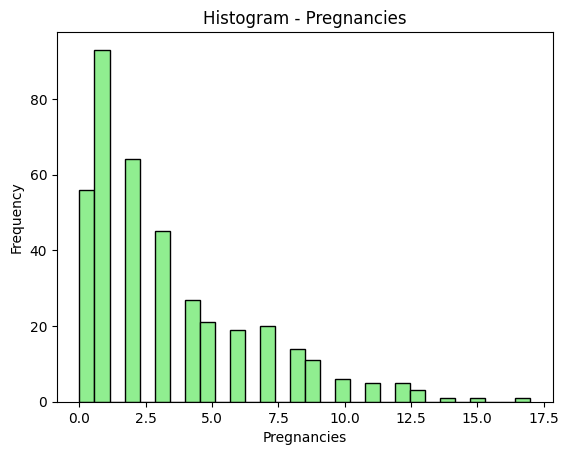

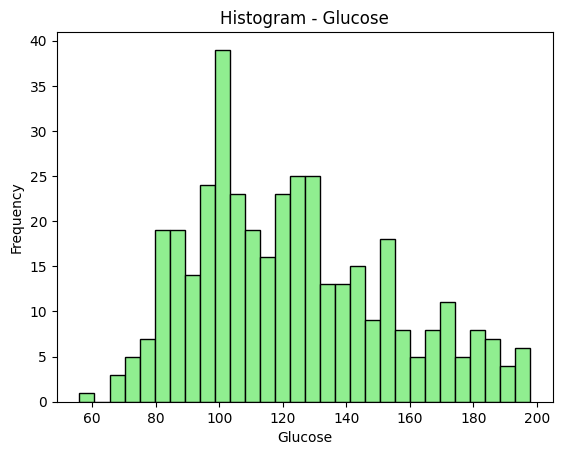

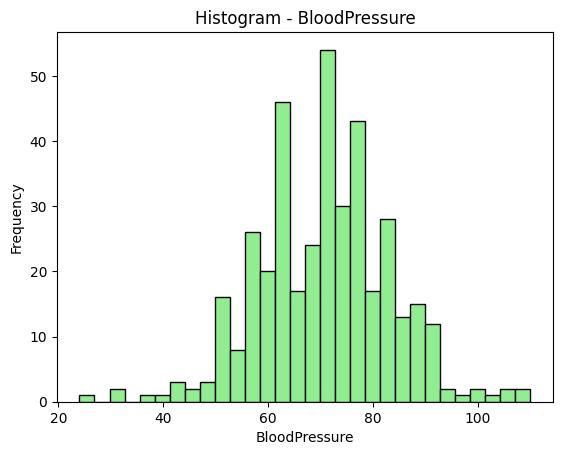

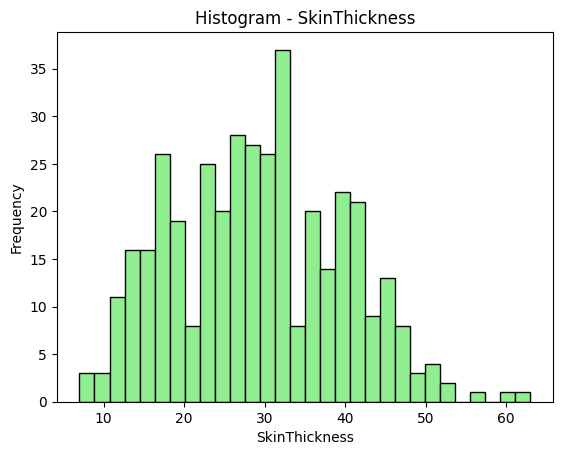

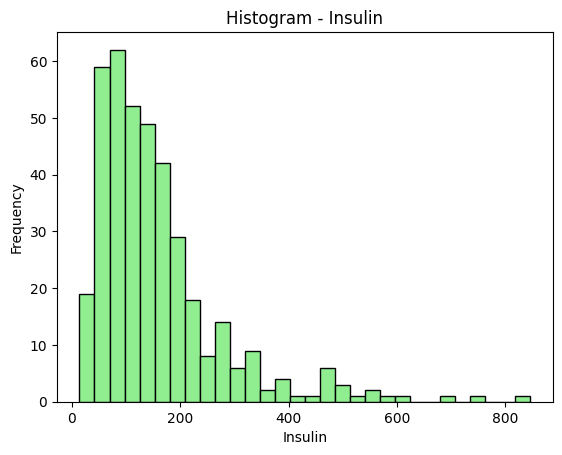

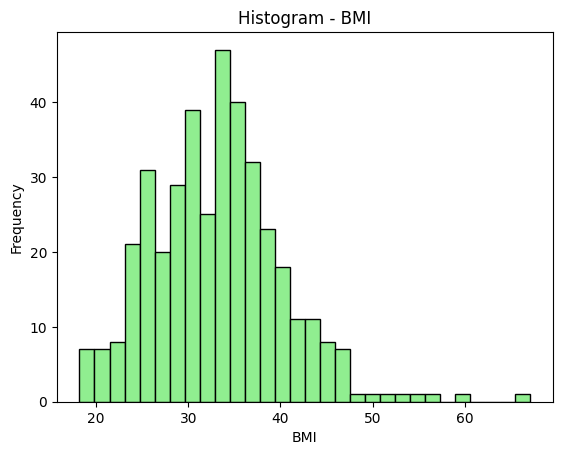

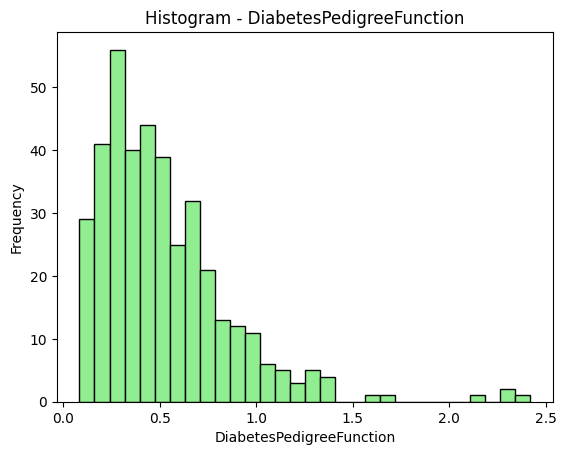

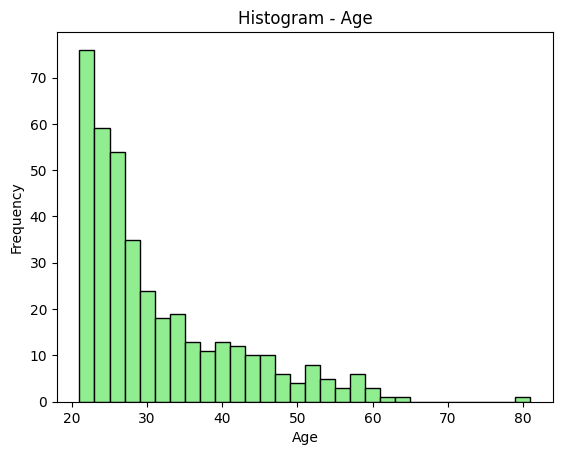

In [267]:
normality_plots(df)

<h1>Sprawdzenie normalnośći zmiennych - test Kołmogorowa-Smirnowa</h1>

In [268]:
def kolmogorov_smirnov_test(df):
    for i in range(df.shape[1] - 1):
        data = df.iloc[:, i]
        standardized_data = (data - data.mean()) / data.std()
        stat, p_value = kstest(standardized_data, 'norm')
        print(f"Test Kołmogorowa-Smirnowa dla kolumny {df.columns[i]}")
        print(f"Statystyka = {stat:.3f}")
        print(f"P-wartość = {p_value:.3f}")

In [269]:
kolmogorov_smirnov_test(df)

Test Kołmogorowa-Smirnowa dla kolumny Pregnancies
Statystyka = 0.201
P-wartość = 0.000
Test Kołmogorowa-Smirnowa dla kolumny Glucose
Statystyka = 0.081
P-wartość = 0.011
Test Kołmogorowa-Smirnowa dla kolumny BloodPressure
Statystyka = 0.045
P-wartość = 0.389
Test Kołmogorowa-Smirnowa dla kolumny SkinThickness
Statystyka = 0.055
P-wartość = 0.186
Test Kołmogorowa-Smirnowa dla kolumny Insulin
Statystyka = 0.145
P-wartość = 0.000
Test Kołmogorowa-Smirnowa dla kolumny BMI
Statystyka = 0.039
P-wartość = 0.573
Test Kołmogorowa-Smirnowa dla kolumny DiabetesPedigreeFunction
Statystyka = 0.106
P-wartość = 0.000
Test Kołmogorowa-Smirnowa dla kolumny Age
Statystyka = 0.182
P-wartość = 0.000


<p style="font-size:20px;">Na podstawie histogramów oraz testu Kołmogorowa-Smirnowa możemy stwierdzić, że wartości w następujących kolumnach mają rozkład normalny:</p>
    <ul>
        <li style="font-size:18px";>BloodPressure</li>
        <li style="font-size:18px";>SkinThickness</li>
        <li style="font-size:18px";>BMI</li>
    </ul>

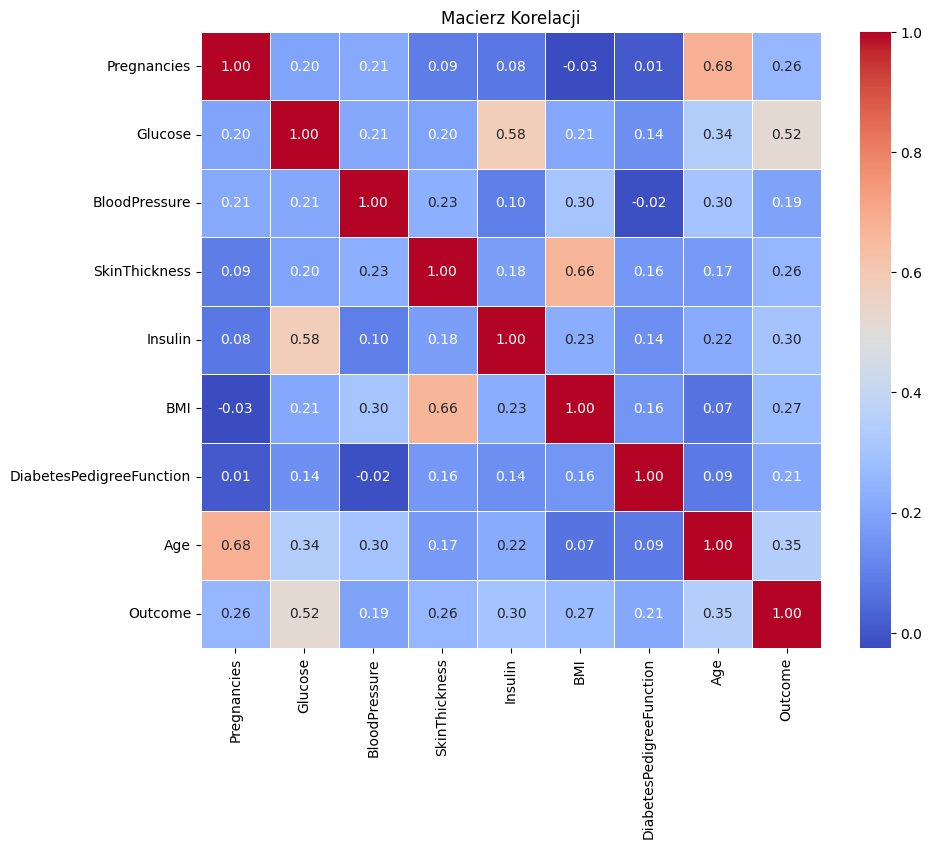

In [270]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Macierz Korelacji")
plt.show()

<p style="font-size:20px;">Widzimy, że najbardziej skorelowane z cukrzycą są: glukoza, wiek oraz insulina. Mocno skorelowane są także wiek z ilością ciąży, BMI z grubością skóry oraz insulina z glukozą.</p>

<h1>Test sferyczności Bartletta</h1>

In [271]:
numeric_cols = df.drop(columns=["Outcome"])

R = numeric_cols.corr()

eigenvalues = np.linalg.eigvals(R)

n = len(df)
p = numeric_cols.shape[1]

chi2_stat = -(n - 1 - (2 * p + 5) / 6) * np.log(np.linalg.det(R))

df_bartlett = p * (p - 1) / 2

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df_bartlett)

print(f"Statystyka testu chi2: {chi2_stat:.2f}")
print(f"Stopnie swobody: {df_bartlett}")
print(f"Wartość krytyczna: {critical_value:.2f}")

if chi2_stat > critical_value:
    print("Odrzucamy hipotezę zerową H0: Macierz korelacji nie jest jednostkowa (zmienne są skorelowane) i robienie PCA ma sens.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej H0: Zmienne są niezależne, a PCA nie będzie skuteczne w redukcji wymiarów danych.")

Statystyka testu chi2: 815.99
Stopnie swobody: 28.0
Wartość krytyczna: 41.34
Odrzucamy hipotezę zerową H0: Macierz korelacji nie jest jednostkowa (zmienne są skorelowane) i robienie PCA ma sens.


<h1>Skalowanie danych</h1>

In [272]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

<h1>PCA</h1>

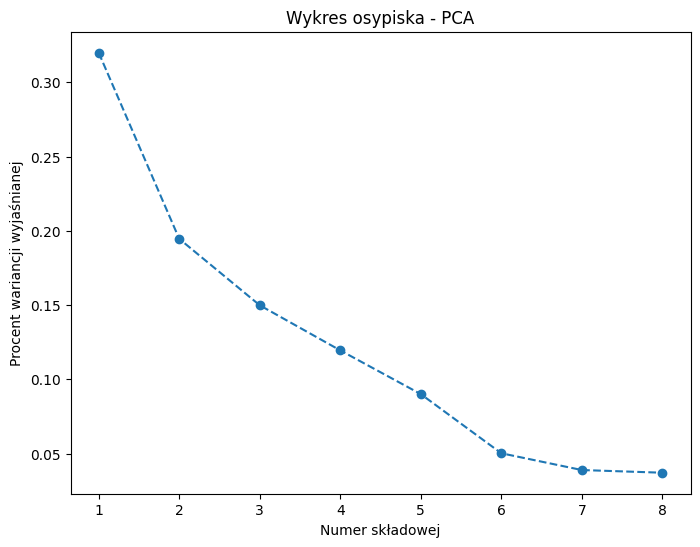

In [273]:
pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Wykres osypiska - PCA')
plt.xlabel('Numer składowej')
plt.ylabel('Procent wariancji wyjaśnianej')
plt.show()

<p style="font-size:20px;">Na podstawie wykresu widzimy, że wypłaszczenie zaczyna się od 6 zmiennej, dlatego do PCA wybieramy 6 czynników.</p>

In [274]:
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_data)
print(f"Suma wariancji dla 6 komponentów wynosi {sum(pca.explained_variance_ratio_):.2f}")

Suma wariancji dla 6 komponentów wynosi 0.92


In [275]:
print("Wariancja wyjaśniona przez każdy komponent:")
print(pca.explained_variance_ratio_)

Wariancja wyjaśniona przez każdy komponent:
[0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765]


In [276]:
explained_variance_ratio = pca.explained_variance_ratio_

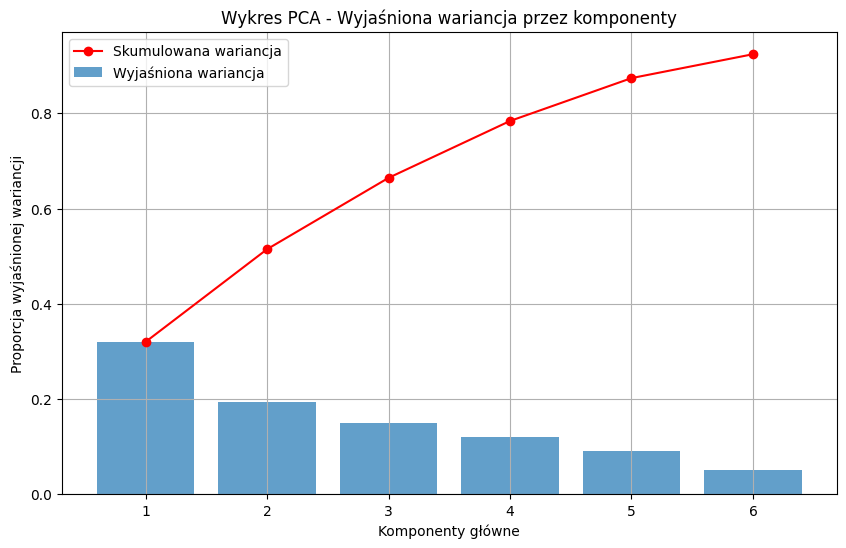

In [277]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), explained_variance_ratio, alpha=0.7, label='Wyjaśniona wariancja')
plt.plot(range(1, 7), np.cumsum(explained_variance_ratio), marker='o', color='red', label='Skumulowana wariancja')
plt.xlabel('Komponenty główne')
plt.ylabel('Proporcja wyjaśnionej wariancji')
plt.title('Wykres PCA - Wyjaśniona wariancja przez komponenty')
plt.xticks(range(1, 7))
plt.legend()
plt.grid(True)
plt.show()

<h1>Wybór ilości klastrów</h1>

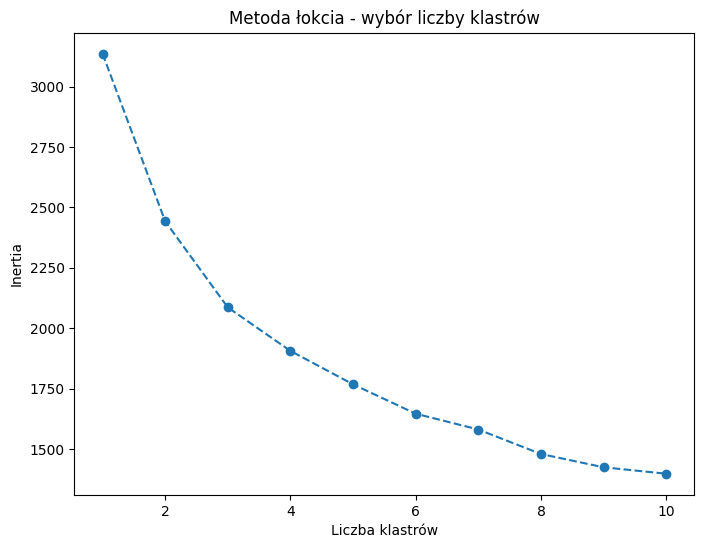

In [278]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Metoda łokcia - wybór liczby klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')
plt.show()

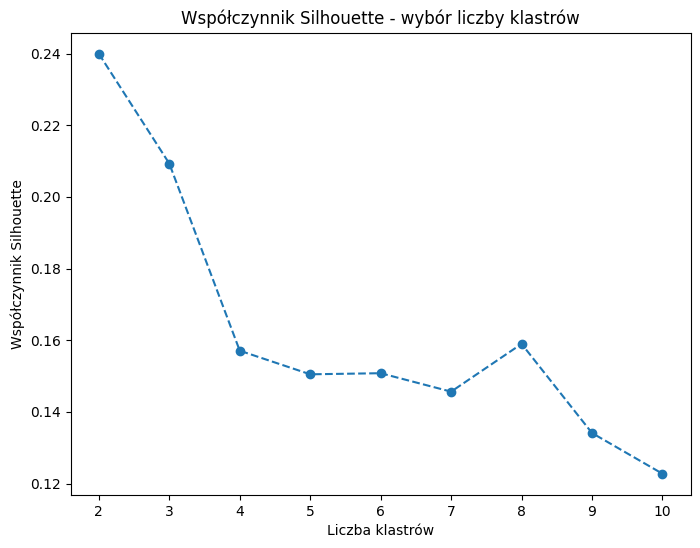

In [279]:
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o', linestyle='--')
plt.title('Współczynnik Silhouette - wybór liczby klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Współczynnik Silhouette')
plt.show()

<p style="font-size:20px;">Na podstawie wykresów możemy stwierdzić, że najlepsza liczba klastrów do klasteryzacji to 2.</p>

<h1>Klasteryzacja K-means</h1>

In [280]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

C:\Users\szwed\AppData\Local\Temp\ipykernel_2680\2000615389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


<h1>Obliczenie dokładności klasteryzacji z podziałem na osoby chory i zdrowe</h1>

In [281]:
good = (df['Outcome'] != df['Cluster']).sum()
accuracy = good / df.shape[0]

print(f'Dokładność klasteryzacji k-means wynosi: {accuracy}')

Dokładność klasteryzacji k-means wynosi: 0.7448979591836735


In [282]:
df_cluster0 = df[df.Cluster == 0]
df_cluster1 = df[df.Cluster == 1]

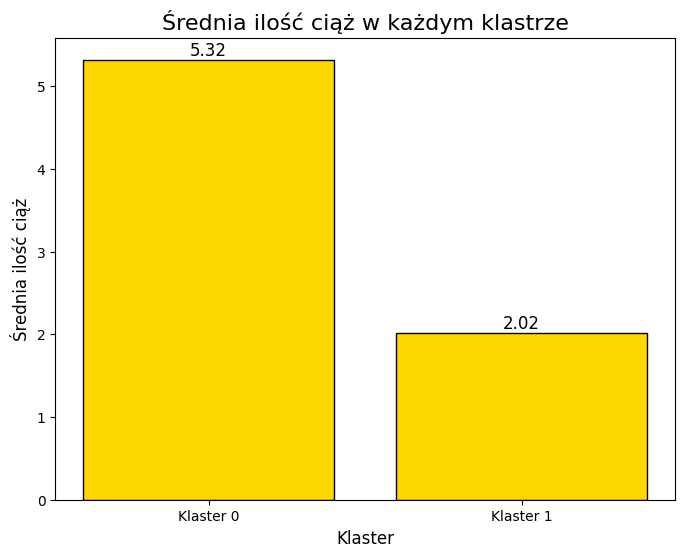

In [283]:
average_pregnancies = [
    df_cluster0['Pregnancies'].mean(),
    df_cluster1['Pregnancies'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_pregnancies, color='gold', edgecolor='black')

plt.title('Średnia ilość ciąż w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia ilość ciąż', fontsize=12)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

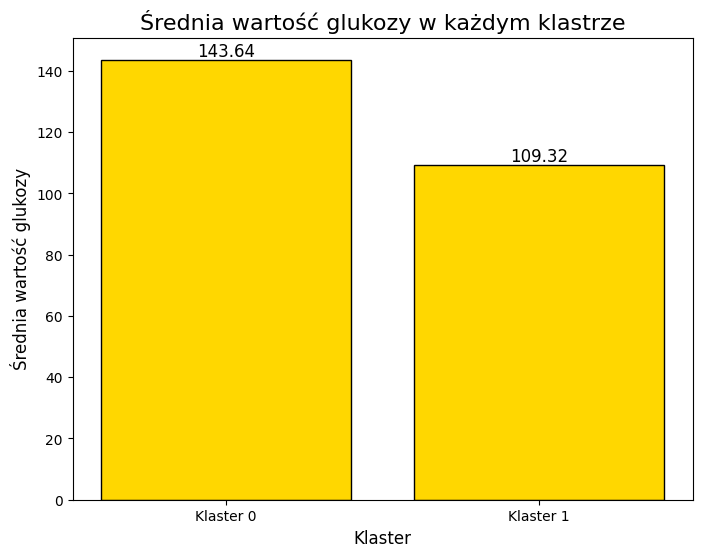

In [284]:
average_glucose = [
    df_cluster0['Glucose'].mean(),
    df_cluster1['Glucose'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_glucose, color='gold', edgecolor='black')

plt.title('Średnia wartość glukozy w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość glukozy', fontsize=12)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

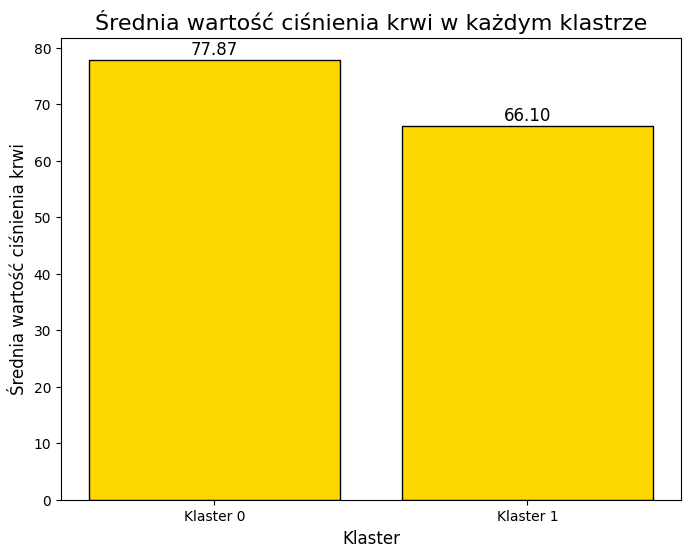

In [285]:
average_bloodpressure = [
    df_cluster0['BloodPressure'].mean(),
    df_cluster1['BloodPressure'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_bloodpressure, color='gold', edgecolor='black')

plt.title('Średnia wartość ciśnienia krwi w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość ciśnienia krwi', fontsize=12)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

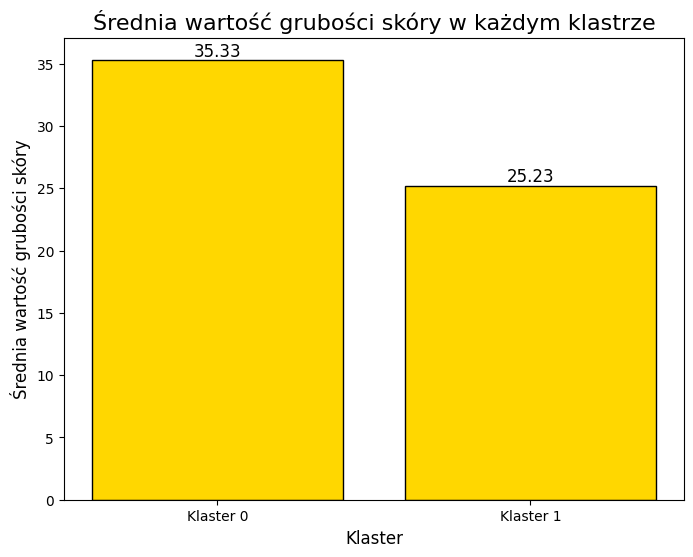

In [286]:
average_skinthickness = [
    df_cluster0['SkinThickness'].mean(),
    df_cluster1['SkinThickness'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_skinthickness, color='gold', edgecolor='black')

plt.title('Średnia wartość grubości skóry w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość grubości skóry', fontsize=12)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

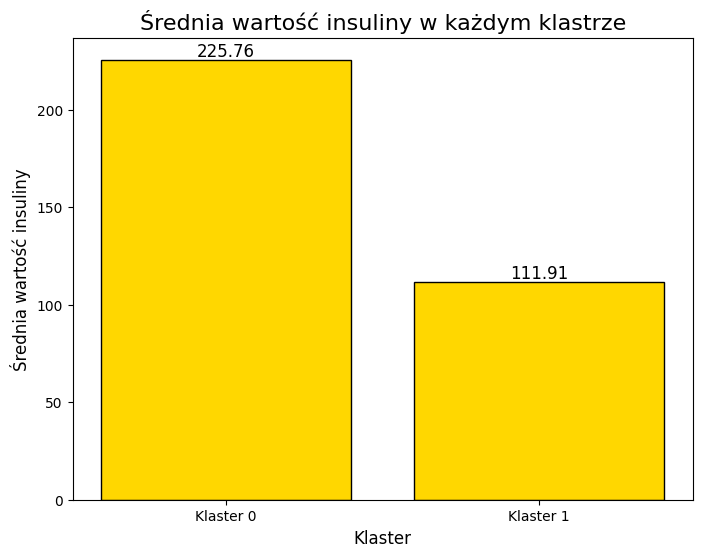

In [287]:
average_insulin = [
    df_cluster0['Insulin'].mean(),
    df_cluster1['Insulin'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_insulin, color='gold', edgecolor='black')

plt.title('Średnia wartość insuliny w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość insuliny', fontsize=12)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1.5, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

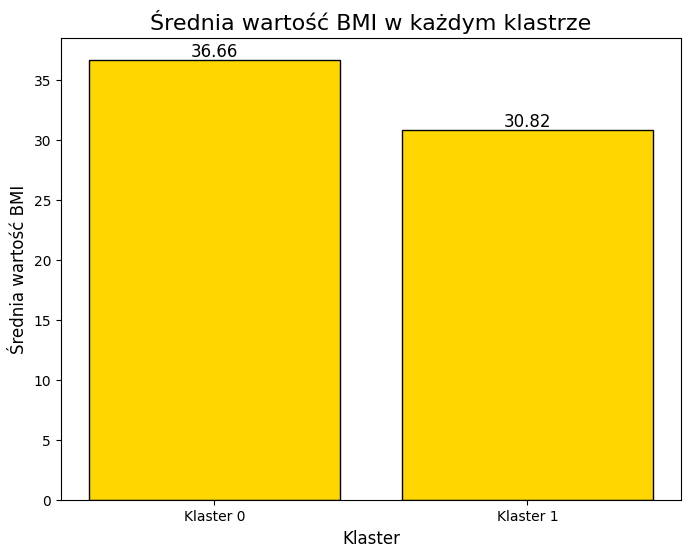

In [288]:
average_bmi = [
    df_cluster0['BMI'].mean(),
    df_cluster1['BMI'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_bmi, color='gold', edgecolor='black')

plt.title('Średnia wartość BMI w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość BMI', fontsize=12)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

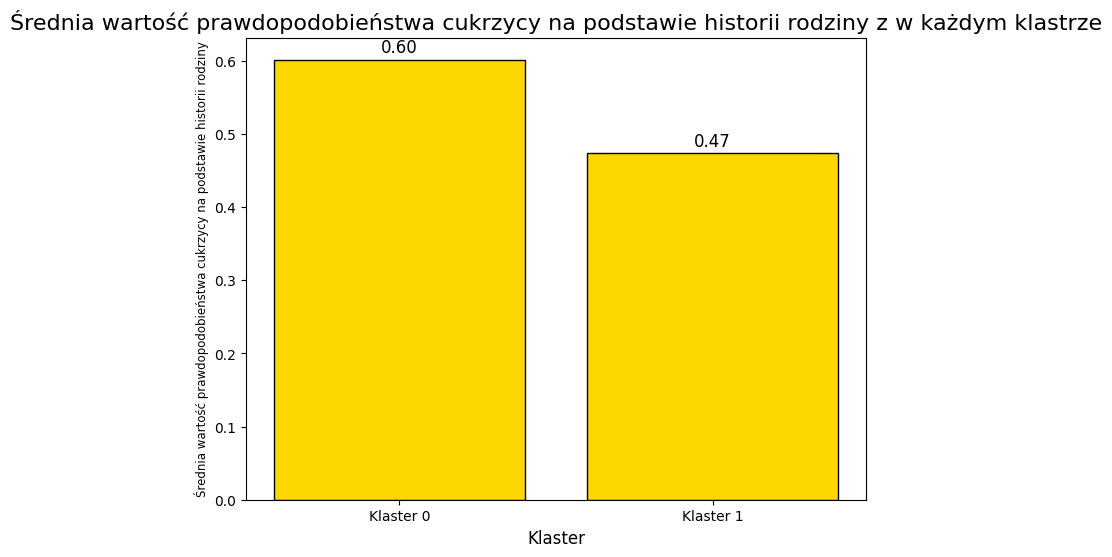

In [289]:
average_diabetespedigreefunction = [
    df_cluster0['DiabetesPedigreeFunction'].mean(),
    df_cluster1['DiabetesPedigreeFunction'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_diabetespedigreefunction, color='gold', edgecolor='black')

plt.title('Średnia wartość prawdopodobieństwa cukrzycy na podstawie historii rodziny z w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość prawdopodobieństwa cukrzycy na podstawie historii rodziny', fontsize=8.5)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

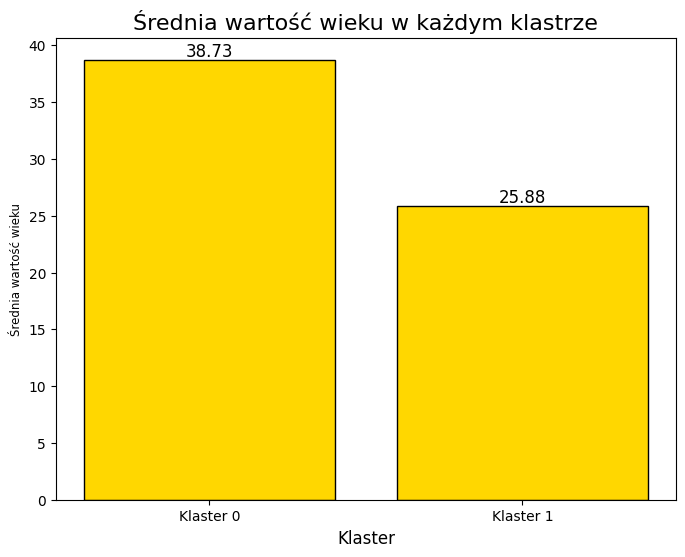

In [290]:
average_age = [
    df_cluster0['Age'].mean(),
    df_cluster1['Age'].mean()
]

clusters = ['Klaster 0', 'Klaster 1']

plt.figure(figsize=(8, 6))
bars = plt.bar(clusters, average_age, color='gold', edgecolor='black')

plt.title('Średnia wartość wieku w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Średnia wartość wieku', fontsize=8.5)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.show()

<h1>Podsumowanie powyższych wykresów</h1>
<p style="font-size:20px;">Widzimy, że w klastrze 0 wszystkie wartości z kolumn są wyższe niż w klastrze 1.</p>

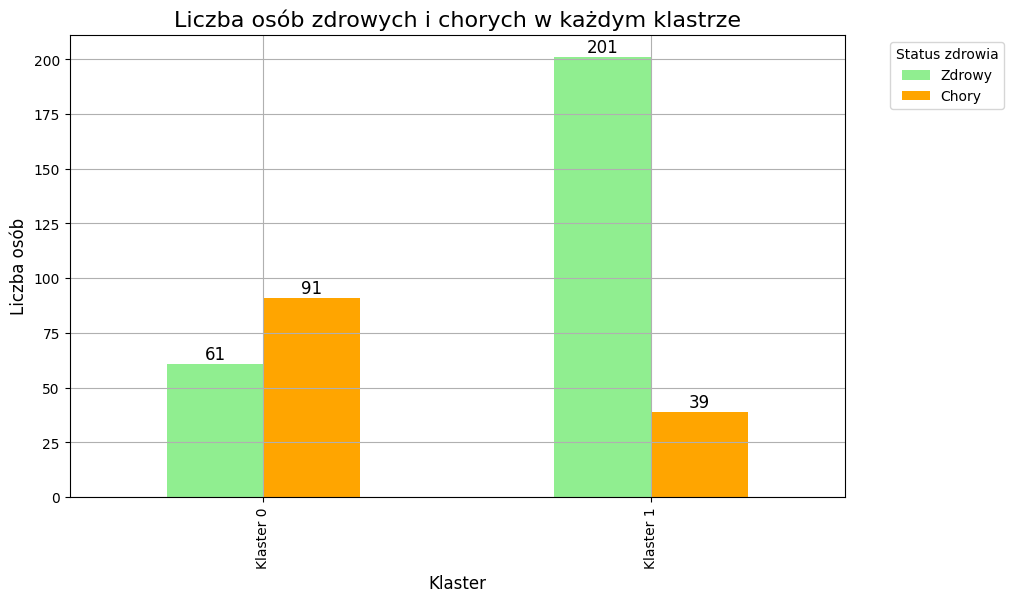

In [291]:
healthy_sick_counts = {
    'Klaster 0': [
        (df_cluster0['Outcome'] == 0).sum(),
        (df_cluster0['Outcome'] == 1).sum()
    ],
    'Klaster 1': [
        (df_cluster1['Outcome'] == 0).sum(),
        (df_cluster1['Outcome'] == 1).sum()
    ]
}

cluster_health_counts = pd.DataFrame(healthy_sick_counts, index=['Zdrowy', 'Chory']).T

ax = cluster_health_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightgreen', 'orange'])

plt.title('Liczba osób zdrowych i chorych w każdym klastrze', fontsize=16)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.2), ha='center', va='bottom', fontsize=12)

plt.legend(title='Status zdrowia', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid()
plt.show()

<p style="font-size:20px;">Widzimy, że w klastrze 0 przeważają osoby chore, a w klastrze 1 osoby zdrowe.</p>

# ALGORYTM APRIORI

In [292]:
# dane liczbowe przekształcamy w kategorie
def discretize(column, bins, labels):
    return pd.cut(column, bins=bins, labels=labels, include_lowest=True) # metoda dzieli zakres wartości liczbowych na przedziały (bins)

# kategorie weźmiemy na podstawie kwartyli
discretized_df = pd.DataFrame()
discretized_df['Pregnancies'] = discretize(df['Pregnancies'], bins=[-1, 3, 6, 17], labels=['Low', 'Medium', 'High'])  # tutaj zakres to (-1, 17]! 
discretized_df['Glucose'] = discretize(df['Glucose'], bins=[-1, 117, 140.25, 199], labels=['Low', 'Medium', 'High'])
discretized_df['BloodPressure'] = discretize(df['BloodPressure'], bins=[-1, 72, 80, 122], labels=['Low', 'Medium', 'High'])
discretized_df['SkinThickness'] = discretize(df['SkinThickness'], bins=[-1, 23, 32, 99], labels=['Low', 'Medium', 'High'])
discretized_df['Insulin'] = discretize(df['SkinThickness'], bins=[-1, 30.5, 127.25, 846], labels=['Low', 'Medium', 'High'])
discretized_df['BMI'] = discretize(df['BMI'], bins=[-1, 32, 36.6, 67.1], labels=['Underweight', 'Normal', 'Overweight'])
discretized_df['DiabetesPedigreeFunction'] = discretize(df['DiabetesPedigreeFunction'], bins=[-1, 0.3725, 0.62625, 2.42], labels=['Low', 'Medium', 'High'])
discretized_df['Age'] = discretize(df['Age'], bins=[-1, 29, 41, 81], labels=['Young', 'Middle-aged', 'Old'])
discretized_df['Outcome'] = discretize(df['Outcome'], bins=[-1, 0, 1], labels=['No-diabetes', 'Diabetes'])


In [293]:
# zamienimy każdą kategorie na zmienną binarna (ONE HOT ENCODING)
discretized_df = pd.get_dummies(discretized_df)
discretized_df

,Pregnancies_Low,Pregnancies_Medium,Pregnancies_High,Glucose_Low,Glucose_Medium,Glucose_High,BloodPressure_Low,BloodPressure_Medium,BloodPressure_High,SkinThickness_Low,...,BMI_Normal,BMI_Overweight,DiabetesPedigreeFunction_Low,DiabetesPedigreeFunction_Medium,DiabetesPedigreeFunction_High,Age_Young,Age_Middle-aged,Age_Old,Outcome_No-diabetes,Outcome_Diabetes
3,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
4,True,False,False,False,True,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,True
6,True,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
8,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True
13,True,False,False,False,False,True,True,False,False,True,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,True,False,False,False,False,True,False,False,True,False,...,False,True,True,False,False,True,False,False,False,True
755,True,False,False,False,True,False,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True
760,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
763,False,False,True,True,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,True,False


In [294]:
frequent_itemsets = apriori(
    discretized_df, 
    min_support=0.3,       
    use_colnames=True       
)
frequent_itemsets

,support,itemsets
0,0.658163,(Pregnancies_Low)
1,0.482143,(Glucose_Low)
2,0.571429,(BloodPressure_Low)
3,0.323980,(SkinThickness_Low)
4,0.308673,(SkinThickness_Medium)
5,0.367347,(SkinThickness_High)
6,0.561224,(Insulin_Low)
7,0.438776,(Insulin_Medium)
8,0.451531,(BMI_Underweight)
9,0.408163,(DiabetesPedigreeFunction_Low)


### Wnioski:
#### - najwyższe wsparcia dotycza zbioru (Pregnancies_Low) oraz (Outcome_No-diabetes), co oznacza, że te kombinacje występują najczęściej w danych.
#### - młodszy wiek często wiążę się z mniejszą ilością ciąż oraz mniejszym poziomem glukozy
#### - mniejsza ilość ciąży często występuję również z mniejszym poziomem glukozy, insuliny oraz ciśnieniem krwi
#### - przy braku cukrzycy najczęściej pojawia się młodszy wiek, co może sugerować silną korelację między tymi dwiema zmiennymi

## Czemu FP-Growth a nie APRIROI?

In [295]:
%timeit -n 100 -r 10 apriori(discretized_df, min_support=0.3)

2.13 ms ± 333 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [296]:
%timeit -n 100 -r 10 fpgrowth(discretized_df, min_support=0.3)

28.5 ms ± 308 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)


## Wniosek: FP-Growth jest ok. 16 razy wolniejszy od Apriori
#### Różnica prawdopodobnie wynika z tego, że FP-Growth jest zazwyczaj szybszy dla większych zbiorów. W przypadku mniejszych danych Apriori, może wykonywać się szybciej, ponieważ jest mniej skomplikowany

In [297]:
rules = association_rules(
    frequent_itemsets, 
    metric="confidence",    
    min_threshold=0.9  ,
    num_itemsets = len(discretized_df)    
)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(SkinThickness_Low),(Insulin_Low),0.323980,0.561224,0.323980,1.000000,1.781818,1.0,0.142154,inf,0.649057,0.577273,1.000000,0.788636
1,(SkinThickness_High),(Insulin_Medium),0.367347,0.438776,0.367347,1.000000,2.279070,1.0,0.206164,inf,0.887097,0.837209,1.000000,0.918605
2,"(Glucose_Low, Pregnancies_Low)",(Age_Young),0.367347,0.607143,0.331633,0.902778,1.486928,1.0,0.108601,4.040816,0.517618,0.515873,0.752525,0.724498
3,"(Glucose_Low, Age_Young)",(Pregnancies_Low),0.364796,0.658163,0.331633,0.909091,1.381254,1.0,0.091537,3.760204,0.434538,0.479705,0.734057,0.706483
4,"(Glucose_Low, Pregnancies_Low)",(Outcome_No-diabetes),0.367347,0.668367,0.331633,0.902778,1.350721,1.0,0.086110,3.411079,0.410422,0.471014,0.706838,0.699480
5,"(Pregnancies_Low, Outcome_No-diabetes)",(Age_Young),0.479592,0.607143,0.433673,0.904255,1.489362,1.0,0.142493,4.103175,0.631373,0.664063,0.756286,0.809271
6,"(Glucose_Low, Age_Young)",(Outcome_No-diabetes),0.364796,0.668367,0.331633,0.909091,1.360167,1.0,0.087815,3.647959,0.416867,0.472727,0.725874,0.702637
7,"(Glucose_Low, Pregnancies_Low, Outcome_No-diab...",(Age_Young),0.331633,0.607143,0.303571,0.915385,1.507692,1.0,0.102223,4.642857,0.503817,0.477912,0.784615,0.707692
8,"(Glucose_Low, Pregnancies_Low, Age_Young)",(Outcome_No-diabetes),0.331633,0.668367,0.303571,0.915385,1.369583,1.0,0.081919,3.919295,0.403746,0.435897,0.744852,0.684792
9,"(Glucose_Low, Outcome_No-diabetes, Age_Young)",(Pregnancies_Low),0.331633,0.658163,0.303571,0.915385,1.390817,1.0,0.085303,4.039889,0.420425,0.442379,0.752468,0.688312
